In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for TB cases
n_samples = 1000
population_size = np.random.randint(1000, 100000, n_samples)
population_density = np.random.uniform(50, 5000, n_samples)
temperature = np.random.uniform(10, 40, n_samples)
herd_immunity = np.random.uniform(0, 1, n_samples)

In [ ]:
# Synthetic formula for generating TB cases (spread)
tb_cases = (0.15 * population_size + 0.1 * population_density -
            12 * temperature - 15000 * herd_immunity +
            np.random.normal(0, 3000, n_samples))


In [ ]:
# Create a DataFrame
data = pd.DataFrame({
    'Population_Size': population_size,
    'Population_Density': population_density,
    'Temperature': temperature,
    'Herd_Immunity': herd_immunity,
    'TB_Cases': tb_cases
})


In [ ]:
# Display the first few rows of the data
print(data.head())

   Population_Size  Population_Density  Temperature  Herd_Immunity  \
0            16795         1224.272619    24.908904       0.677813   
1             1860          553.823239    39.764740       0.607752   
2            77820          806.652739    35.542749       0.295301   
3            55886         1267.490756    16.255315       0.136601   
4             7265          845.372798    37.917856       0.651640   

       TB_Cases  
0  -7655.418736  
1 -10795.513592  
2  10496.544363  
3   5609.608501  
4 -13714.719565  


In [ ]:
# Split data into features and target variable
X = data[['Population_Size', 'Population_Density', 'Temperature', 'Herd_Immunity']]
y = data['TB_Cases']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and fit the MLR model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict the TB cases on the test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print the coefficients and performance metrics
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Coefficients: [ 1.45951396e-01  1.14411321e-01 -8.14637473e+00 -1.48700832e+04]
Intercept: -14.101315447704621
Mean Squared Error: 7977847.469175763
R^2 Score: 0.84528143551222


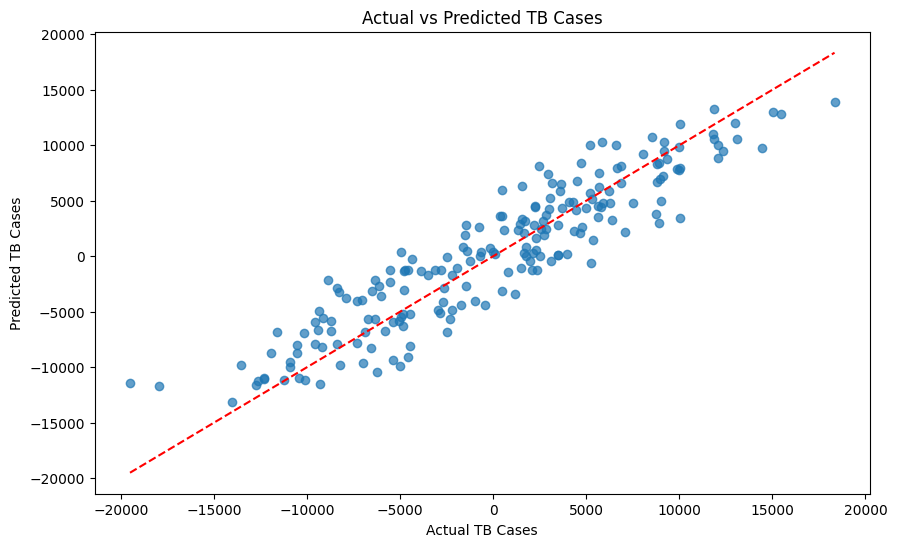

In [ ]:
# Visualize the relationship between actual and predicted TB cases
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual TB Cases')
plt.ylabel('Predicted TB Cases')
plt.title('Actual vs Predicted TB Cases')
plt.show()